In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Water-level data from SW Florida during Ian from USGS  

This notebook demos reading in the tab-delimited water-level data from four files using Pandas.  

There are also some data available from the Keys, but they are not included here.  

All data were downloaded using the Flood Event Viewr (https://stn.wim.usgs.gov/fev/#2022Ian) to open the legacy web page (e.g. https://waterdata.usgs.gov/nwis/uv?site_no=275840082495601&legacy=1) on 1/18/2023.  

Tide guage and wave data  
NWIS SITE 02293202  
CALOOSAHATCHEE RIVER AT FORT MYERS FL  

62620 Elevation, ocean/est, NAVD88 [Mean level]	2022-09-26 	2022-10-03  
62622 Elevation, ocean/est, NAVD88 [Maximum level]	2022-09-26 	2022-10-03  
62622 Elevation, ocean/est, NAVD88 [Mean level]	2022-09-26 	2022-10-03  
62622 Elevation, ocean/est, NAVD88 [Minimum level]	2022-09-26 	2022-10-03  
72286 Significant wave ht	2022-09-26 	2022-10-03  
72287 Significant wave pd [TPEAK]	2022-09-26 	2022-10-03  

RDGs  
Site 275840082495601  
Gulf of Mexico at Clearwater Beach, FL  

Site 273511082371300  
Tampa Bay at Skyway Bridge near Terraceia, FL  

Site 271956082345200  
New Pass at Lido Key near Sarasota, FL  

In [2]:
data_dir = r'/vortexfs1/home/csherwood/proj/NOPP/data/'
ftmyers = 'USGS_02293202_Caloosahatchee'
tbay = 'USGS_273511082371300_Tampa_Bay'
clear = 'USGS_275840082495601_Clearwater'
npass = 'USGS_271956082345200_New_Pass'

In [3]:
col_names = ['Agency','Site','Date','Time','TZ','Elev ft','Approved'] 
df_fm = pd.read_csv( data_dir + ftmyers + '.txt', skiprows = 28, header=None, names = col_names, delim_whitespace=True )
df_fm['dt'] = pd.to_datetime( df_fm['Date'].astype(str) + ' ' + df_fm['Time'].astype(str) + ' +0400' )
df_fm['Elev (m)'] = df_fm['Elev ft'].values*.3048
df_fm

,Agency,Site,Date,Time,TZ,Elev ft,Approved,dt,Elev (m)
0,USGS,2293202,2022-09-24,01:00,EDT,0.47,A,2022-09-24 01:00:00+04:00,0.143256
1,USGS,2293202,2022-09-24,01:15,EDT,0.53,A,2022-09-24 01:15:00+04:00,0.161544
2,USGS,2293202,2022-09-24,01:30,EDT,0.57,A,2022-09-24 01:30:00+04:00,0.173736
3,USGS,2293202,2022-09-24,01:45,EDT,0.65,A,2022-09-24 01:45:00+04:00,0.198120
4,USGS,2293202,2022-09-24,02:00,EDT,0.68,A,2022-09-24 02:00:00+04:00,0.207264
...,...,...,...,...,...,...,...,...,...
759,USGS,2293202,2022-10-01,22:45,EDT,1.18,A,2022-10-01 22:45:00+04:00,0.359664
760,USGS,2293202,2022-10-01,23:00,EDT,1.19,A,2022-10-01 23:00:00+04:00,0.362712
761,USGS,2293202,2022-10-01,23:15,EDT,1.20,A,2022-10-01 23:15:00+04:00,0.365760
762,USGS,2293202,2022-10-01,23:30,EDT,1.17,A,2022-10-01 23:30:00+04:00,0.356616


In [4]:
col_names = ['Agency','Site No','Date','Time','TZ','Elev ft','Approved'] 
df_np = pd.read_csv( data_dir + npass + '.txt', skiprows = 29, header=None, names = col_names, delim_whitespace=True )
df_np['dt'] = pd.to_datetime( df_np['Date'].astype(str) + ' ' + df_np['Time'].astype(str) + ' +0400' )
df_np['Elev (m)'] = df_np['Elev ft'].values*.3048
df_np

,Agency,Site No,Date,Time,TZ,Elev ft,Approved,dt,Elev (m)
0,USGS,271956082345200,2022-09-24,10:45,EDT,1.21,A,2022-09-24 10:45:00+04:00,0.368808
1,USGS,271956082345200,2022-09-24,11:00,EDT,1.27,A,2022-09-24 11:00:00+04:00,0.387096
2,USGS,271956082345200,2022-09-24,11:15,EDT,1.34,A,2022-09-24 11:15:00+04:00,0.408432
3,USGS,271956082345200,2022-09-24,11:30,EDT,1.38,A,2022-09-24 11:30:00+04:00,0.420624
4,USGS,271956082345200,2022-09-24,11:45,EDT,1.41,A,2022-09-24 11:45:00+04:00,0.429768
...,...,...,...,...,...,...,...,...,...
667,USGS,271956082345200,2022-10-01,09:30,EDT,-0.54,A,2022-10-01 09:30:00+04:00,-0.164592
668,USGS,271956082345200,2022-10-01,09:45,EDT,-0.61,A,2022-10-01 09:45:00+04:00,-0.185928
669,USGS,271956082345200,2022-10-01,10:00,EDT,-0.67,A,2022-10-01 10:00:00+04:00,-0.204216
670,USGS,271956082345200,2022-10-01,10:15,EDT,-0.71,P,2022-10-01 10:15:00+04:00,-0.216408


In [5]:
col_names = ['Agency','Site No','Date','Time','TZ','Elev ft','Approved'] 
df_tb = pd.read_csv( data_dir + tbay + '.txt', skiprows = 29, header=None, names = col_names, delim_whitespace=True )
df_tb['dt'] = pd.to_datetime( df_tb['Date'].astype(str) + ' ' + df_tb['Time'].astype(str) + ' +0400' )
df_tb['Elev (m)'] = df_tb['Elev ft'].values*.3048
df_tb

,Agency,Site No,Date,Time,TZ,Elev ft,Approved,dt,Elev (m)
0,USGS,273511082371300,2022-09-24,18:00,EDT,-0.29,A,2022-09-24 18:00:00+04:00,-0.088392
1,USGS,273511082371300,2022-09-24,18:15,EDT,-0.36,A,2022-09-24 18:15:00+04:00,-0.109728
2,USGS,273511082371300,2022-09-24,18:30,EDT,-0.38,A,2022-09-24 18:30:00+04:00,-0.115824
3,USGS,273511082371300,2022-09-24,18:45,EDT,-0.43,A,2022-09-24 18:45:00+04:00,-0.131064
4,USGS,273511082371300,2022-09-24,19:00,EDT,-0.46,A,2022-09-24 19:00:00+04:00,-0.140208
...,...,...,...,...,...,...,...,...,...
569,USGS,273511082371300,2022-09-30,16:15,EDT,0.18,A,2022-09-30 16:15:00+04:00,0.054864
570,USGS,273511082371300,2022-09-30,16:30,EDT,0.26,A,2022-09-30 16:30:00+04:00,0.079248
571,USGS,273511082371300,2022-09-30,16:45,EDT,0.31,A,2022-09-30 16:45:00+04:00,0.094488
572,USGS,273511082371300,2022-09-30,17:00,EDT,0.37,A,2022-09-30 17:00:00+04:00,0.112776


#### Read and plot the data from Clearwater site 275840082495601  
This is in a different format and has more columns, incl. wave data.  
Some data cleanup would be required for a nice plot.  
All data is labelled 'P' for provisional.  
Last data column is same as column 2, but in feet.  

 TS      parameter     Description  
317558       62622     Estuary or ocean water surface elevation above NAVD 1988, meters, [Maximum level]  
317559       62622     Estuary or ocean water surface elevation above NAVD 1988, meters, [Mean level]  
317561       62622     Estuary or ocean water surface elevation above NAVD 1988, meters, [Minimum level]  
317563       72286     Significant wave height, meters  
317566       72287     Significant wave period, seconds, [TPEAK]  
317657       62620     Estuary or ocean water surface elevation above NAVD 1988, feet, [Mean level]  

In [6]:
col_names = ['Agency','Site No','Date','Time','TZ','Max. Elev. (m)','A0',\
             'Mean Elev. (m)','A1','Min. Elev. (m)','A2', 'Hs (m)', 'A3', 'Tp (s)', 'A4',
             'Elev. (ft)', 'A5'] 
df_clr = pd.read_csv( data_dir + clear + '.txt', skiprows = 34, names = col_names, header=None, delim_whitespace=True )
df_clr['dt'] = pd.to_datetime( df_clr['Date'].astype(str) + ' ' + df_clr['Time'].astype(str) + ' +0400' )
df_clr

,Agency,Site No,Date,Time,TZ,Max. Elev. (m),A0,Mean Elev. (m),A1,Min. Elev. (m),A2,Hs (m),A3,Tp (s),A4,Elev. (ft),A5,dt
0,USGS,275840082495601,2022-09-26,15:06,EDT,0.870,P,0.617,P,0.360,P,0.358,P,2.3,P,2.02,P,2022-09-26 15:06:00+04:00
1,USGS,275840082495601,2022-09-26,15:12,EDT,0.822,P,0.600,P,0.417,P,0.324,P,2.8,P,1.97,P,2022-09-26 15:12:00+04:00
2,USGS,275840082495601,2022-09-26,15:18,EDT,0.831,P,0.589,P,0.378,P,0.379,P,2.3,P,1.93,P,2022-09-26 15:18:00+04:00
3,USGS,275840082495601,2022-09-26,15:24,EDT,0.840,P,0.557,P,0.344,P,0.336,P,2.1,P,1.83,P,2022-09-26 15:24:00+04:00
4,USGS,275840082495601,2022-09-26,15:30,EDT,0.821,P,0.528,P,0.309,P,0.393,P,2.8,P,1.73,P,2022-09-26 15:30:00+04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,USGS,275840082495601,2022-10-03,14:36,EDT,0.158,P,-0.174,P,-0.433,P,0.462,P,2.8,P,-0.57,P,2022-10-03 14:36:00+04:00
1663,USGS,275840082495601,2022-10-03,14:42,EDT,0.112,P,-0.173,P,-0.411,P,0.357,P,2.3,P,-0.57,P,2022-10-03 14:42:00+04:00
1664,USGS,275840082495601,2022-10-03,14:48,EDT,0.126,P,-0.162,P,-0.406,P,0.464,P,3.2,P,-0.53,P,2022-10-03 14:48:00+04:00
1665,USGS,275840082495601,2022-10-03,14:54,EDT,0.118,P,-0.140,P,-0.463,P,0.414,P,3.2,P,-0.46,P,2022-10-03 14:54:00+04:00


### Plot the Clearwater water levels

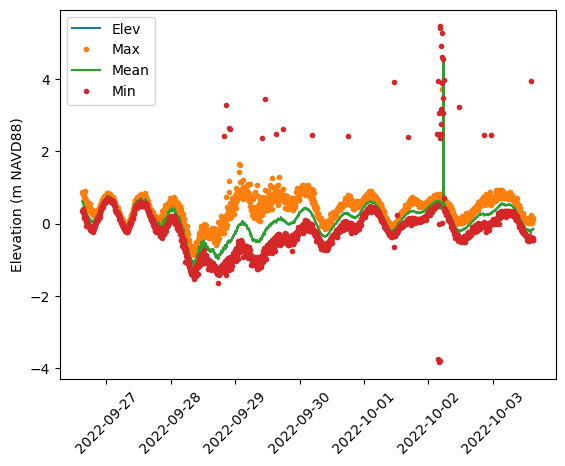

In [8]:
plt.plot(df_clr['dt'],df_clr['Elev. (ft)']*.3048, label='Elev')
plt.plot(df_clr['dt'],df_clr['Max. Elev. (m)'],'.', label='Max')
plt.plot(df_clr['dt'],df_clr['Mean Elev. (m)'], label='Mean')
plt.plot(df_clr['dt'],df_clr['Min. Elev. (m)'], '.', label='Min')

plt.legend()
plt.ylabel('Elevation (m NAVD88)')
_ = plt.xticks(rotation=45)

#### Plot the Clearwater wave data

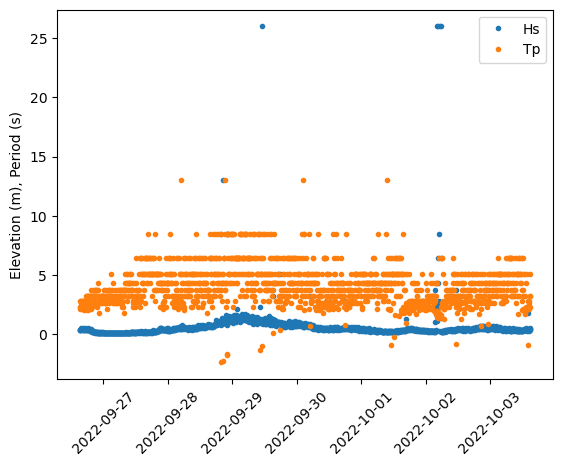

In [9]:
plt.plot(df_clr['dt'],df_clr['Hs (m)'],'.',label='Hs')
plt.plot(df_clr['dt'],df_clr['Tp (s)'],'.', label='Tp')

plt.legend()
plt.ylabel('Elevation (m), Period (s)')
_ = plt.xticks(rotation=45)

In [10]:
#### Plot all of the water-level data

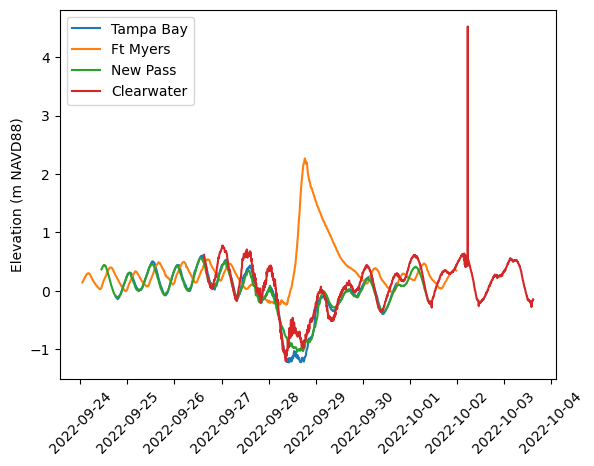

In [11]:
plt.plot(df_tb['dt'],df_tb['Elev (m)'], label='Tampa Bay')
plt.plot(df_fm['dt'],df_fm['Elev (m)'], label='Ft Myers')
plt.plot(df_np['dt'],df_np['Elev (m)'], label='New Pass')
plt.plot(df_clr['dt'],df_clr['Mean Elev. (m)'], label='Clearwater')

plt.legend()
plt.ylabel('Elevation (m NAVD88)')
_ = plt.xticks(rotation=45)